# Ford GoBike Sysytem Data Exploration
## by Adaobi Onyeakagbu

This report details the data wrangling as well as an exploratory analysis on the 2017- March 2020 Bay Area Bike Share data.

## Content
- [Preliminary Wrangling](#prelim)
- [Univariate Exploration](#univar)
- [Bivariate Exploration](#bivar)
- [Multivariate Exploration](#multivar)

<a id='prelim'></a>
## Preliminary Wrangling

In [45]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv
from math import sin, cos, sqrt, atan2, radians
from IPython.display import display
import os
from datetime import datetime
%matplotlib inline


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [30]:
first_df = pd.read_csv('2017-fordgobike-tripdata.csv', dtype={'duration_sec':'int','start_time':'str','end_time':'str','start_station_id':pd.Int64Dtype(),'start_station_name':'str',
          'start_station_latitude':'float','start_station_longitude':'float','end_station_id':pd.Int64Dtype(),
          'end_station_name':'str','end_station_latitude':'float','end_station_longitude':'float',
          'bike_id':'int','user_type':'str'}, header=0,
                        parse_dates=['start_time','end_time'], na_values=['', ' '])
first_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [27]:
files = os.listdir("./files/")
colums = ['duration_sec','start_time','end_time','start_station_id','start_station_name','start_station_latitude',
            'start_station_longitude','end_station_id','end_station_name','end_station_latitude',
            'end_station_longitude','bike_id','user_type']
tables = []
for file in files:
    with open("./files/" + file, 'r') as f_in:
        df = pd.read_csv(f_in, dtype={'duration_sec':'int','start_time':'str','end_time':'str','start_station_id':pd.Int64Dtype(),'start_station_name':'str',
          'start_station_latitude':'float','start_station_longitude':'float','end_station_id':pd.Int64Dtype(),
          'end_station_name':'str','end_station_latitude':'float','end_station_longitude':'float',
          'bike_id':'int','user_type':'str'}, header=0, usecols=colums,
                        parse_dates=['start_time','end_time'], na_values=['', ' '])
        tables.append(df)
    
set_df = pd.concat(tables, axis=0, ignore_index=True)        

display(set_df.head(5))

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber


In [31]:
final_df= pd.concat([first_df, set_df], axis=0, ignore_index=True)
final_df = final_df.sample(frac=.1)

In [39]:
print(final_df.shape)
final_df.info()

(579541, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 579541 entries, 4018389 to 2056693
Data columns (total 13 columns):
duration_sec               579541 non-null int64
start_time                 579541 non-null datetime64[ns]
end_time                   579541 non-null datetime64[ns]
start_station_id           521877 non-null Int64
start_station_name         522050 non-null object
start_station_latitude     579541 non-null float64
start_station_longitude    579541 non-null float64
end_station_id             521724 non-null Int64
end_station_name           521896 non-null object
end_station_latitude       579541 non-null float64
end_station_longitude      579541 non-null float64
bike_id                    579541 non-null int64
user_type                  579541 non-null object
dtypes: Int64(2), datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 63.0+ MB


Before proceeding to exploration, there are some issues that need to be cleaned in the dataset. 
- Rows with null values should be dropped
- Create new columns for the day of the week, month and time.
- Calculate the distance for rides

In [76]:
##make a copy of the dataset for cleaning 
final= final_df.copy()

In [77]:
##drop the rows with null and na values
final = final.dropna()
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512788 entries, 4018389 to 2056693
Data columns (total 13 columns):
duration_sec               512788 non-null int64
start_time                 512788 non-null datetime64[ns]
end_time                   512788 non-null datetime64[ns]
start_station_id           512788 non-null Int64
start_station_name         512788 non-null object
start_station_latitude     512788 non-null float64
start_station_longitude    512788 non-null float64
end_station_id             512788 non-null Int64
end_station_name           512788 non-null object
end_station_latitude       512788 non-null float64
end_station_longitude      512788 non-null float64
bike_id                    512788 non-null int64
user_type                  512788 non-null object
dtypes: Int64(2), datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 55.7+ MB


In [78]:
##get columns for year, month, day of the week and the time the rides were taken
final['year'] = final['start_time'].dt.year
final['ride_month']=final['start_time'].dt.strftime('%B')
final['day_of_week']=final['start_time'].dt.strftime('%a')
final['time_of_day']=final['start_time'].dt.hour


final.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,year,ride_month,day_of_week,time_of_day
4018389,474,2019-08-13 08:51:36.422,2019-08-13 08:59:30.860,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,90,Townsend St at 7th St,37.771058,-122.402717,1357,Subscriber,2019,August,Tue,8
4098528,639,2019-09-30 18:15:45.893,2019-09-30 18:26:25.075,80,Townsend St at 5th St,37.775235,-122.397437,16,Steuart St at Market St,37.794130,-122.394430,12450,Customer,2019,September,Mon,18
2158951,613,2018-11-19 08:10:03.753,2018-11-19 08:20:17.733,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,603,Subscriber,2018,November,Mon,8
1733102,657,2018-09-30 12:17:39.000,2018-09-30 12:28:36.870,121,Mission Playground,37.759210,-122.421339,89,Division St at Potrero Ave,37.769218,-122.407646,1072,Customer,2018,September,Sun,12
4948310,488,2020-01-14 18:31:14.862,2020-01-14 18:39:23.071,81,Berry St at 4th St,37.775880,-122.393170,114,Rhode Island St at 17th St,37.764478,-122.402570,13036,Customer,2020,January,Tue,18


In [79]:
### calculate distance of ride in km
dist=[]
def calculate_distance(row):
    R = 6373.0
    startlat = radians(row['start_station_latitude'])
    startlon = radians(row['start_station_longitude'])
    endlat = radians(row['end_station_latitude'])
    endlon = radians(row['end_station_longitude'])
    
    distlon = endlon - startlon
    distlat = endlat - startlat
    a = sin(distlat / 2)**2 + cos(startlat) * cos(endlat) * sin(distlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = (R * c)*1000
    dist.append(distance)
    
final.apply(calculate_distance, axis=1)
final['distance'] = dist

In [80]:
final['duration_min']= final['duration_sec'] / 60
final=final.sort_values(by=['duration_min'])

In [81]:
final.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,year,ride_month,day_of_week,time_of_day,distance,duration_min
5318343,60,2020-02-21 08:13:01.000,2020-02-21 08:14:02.000,309,San Jose City Hall,37.337391,-121.886995,309,San Jose City Hall,37.337391,-121.886995,174123,Subscriber,2020,February,Fri,8,0.000000,1.000000
3804507,60,2019-07-18 08:20:31.000,2019-07-18 08:21:31.000,317,San Salvador St at 9th St,37.333955,-121.877349,317,San Salvador St at 9th St,37.333955,-121.877349,376583,Subscriber,2019,July,Thu,8,0.000000,1.000000
5725615,60,2020-03-31 12:24:45.000,2020-03-31 12:25:45.000,513,Alameda St at Henry Adams St,37.768546,-122.404403,513,Alameda St at Henry Adams St,37.768546,-122.404403,276620,Subscriber,2020,March,Tue,12,0.000000,1.000000
2306334,61,2018-12-17 13:30:22.725,2018-12-17 13:31:23.769,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,16,Steuart St at Market St,37.794130,-122.394430,3402,Subscriber,2018,December,Mon,13,141.782938,1.016667
3443369,61,2019-06-29 12:39:40.414,2019-06-29 12:40:41.984,104,4th St at 16th St,37.767045,-122.390833,104,4th St at 16th St,37.767045,-122.390833,3629,Subscriber,2019,June,Sat,12,0.000000,1.016667


In [112]:
final.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,year,time_of_day,distance,duration_min
count,506836.000000,506836.000000,506836.000000,506836.000000,506836.000000,506836.000000,506836.000000,506836.000000,506836.000000,506836.000000,506836.000000,506836.000000
mean,709.353077,133.327958,37.769917,-122.355012,130.349423,37.770078,-122.354315,11538.432453,2018.504719,13.508549,1635.588920,11.822551
std,590.246861,114.850229,0.098752,0.134830,114.046448,0.098639,0.134281,68082.390736,0.764607,4.761202,1009.173509,9.837448
min,60.000000,3.000000,37.263310,-122.509071,3.000000,37.263310,-122.509071,11.000000,2017.000000,0.000000,0.000000,1.000000
25%,356.000000,39.000000,37.771058,-122.411901,33.000000,37.771058,-122.411306,1468.000000,2018.000000,9.000000,906.252026,5.933333
50%,562.000000,93.000000,37.781010,-122.398295,93.000000,37.781074,-122.397405,2830.000000,2019.000000,14.000000,1413.991319,9.366667
75%,870.000000,204.000000,37.795393,-122.294837,200.000000,37.796248,-122.294837,5007.000000,2019.000000,17.000000,2161.219922,14.500000
max,5998.000000,521.000000,45.510000,-73.570000,521.000000,45.510000,-73.570000,998430.000000,2020.000000,23.000000,5999.995148,99.966667


In [82]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512788 entries, 5318343 to 5237876
Data columns (total 19 columns):
duration_sec               512788 non-null int64
start_time                 512788 non-null datetime64[ns]
end_time                   512788 non-null datetime64[ns]
start_station_id           512788 non-null Int64
start_station_name         512788 non-null object
start_station_latitude     512788 non-null float64
start_station_longitude    512788 non-null float64
end_station_id             512788 non-null Int64
end_station_name           512788 non-null object
end_station_latitude       512788 non-null float64
end_station_longitude      512788 non-null float64
bike_id                    512788 non-null int64
user_type                  512788 non-null object
year                       512788 non-null int64
ride_month                 512788 non-null object
day_of_week                512788 non-null object
time_of_day                512788 non-null int64
distance          

In [220]:
final.to_csv('gobike_master.csv', 
                 index=False, encoding = 'utf-8')

### Structure of the dataset

> After data wrangling and joining multiple data files to get the coverage of 2017- March 2020, the dataset was very large. Hence I took a fractional sample of the entire dataset to work with and cleaned it. The final dataset has 512788 instances and 19 attributes.

### Main feature(s) of interest in the dataset

> From my initial inspection of the dataset, I can see that the duration of the ride, the distance, stations and the user type are the most interesting features in the dataset. I would like to investigate usage trends in the data for length of ride times, for distance of ride, for specific days of the week and for specific cities, and what kind of users are more common. 

### Features in the dataset that will help support the investigation into the feature(s) of interest

>  I will be utilizing the duration in seconds, the month, year, day of the week, the time the ride was taken, station names, distance of the rides and the user-types.

<a id='univar'></a>
## Univariate Exploration

> In this section, distributions of individual variables are investigated and discussed.

##### What are the usage trends in the data for different types of users, days, months and years?

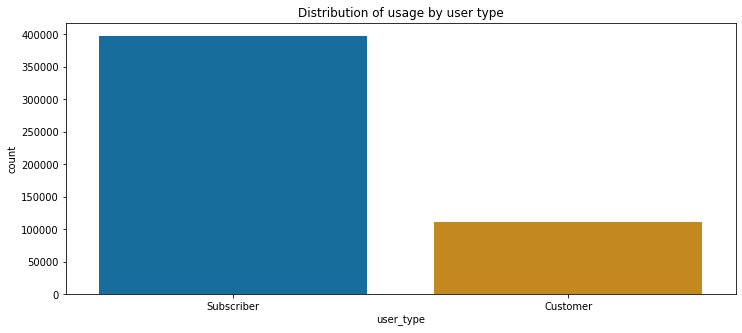

In [102]:
##plot distribution of user type
plt.figure(figsize=(12, 5))
sb.countplot(final['user_type'], palette = sb.color_palette('colorblind'))
plt.title("Distribution of usage by user type")
plt.show();

> The plot above shows that most of the users of the bike share are actually subscribers. Next we will look at the distribution of the rides based on month, day of the week, times of the day and year.

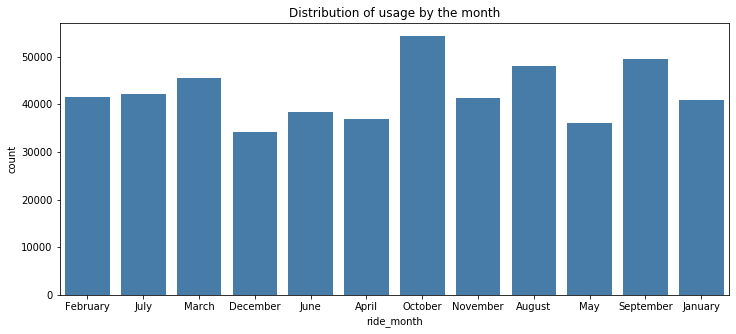

In [103]:
#plot of distribution by month
plt.figure(figsize=(12, 5))
sb.countplot(final['ride_month'], color='#377eb8')
plt.title("Distribution of usage by the month")
plt.show();

In [104]:
final.day_of_week.value_counts()

Tue    86877
Thu    86100
Wed    86066
Mon    80444
Fri    80123
Sat    46974
Sun    41899
Name: day_of_week, dtype: int64

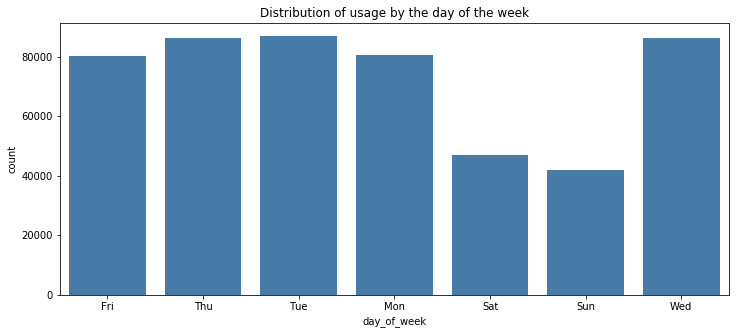

In [99]:
#plot by day of the week
plt.figure(figsize=(12, 5))
sb.countplot(final['day_of_week'], color='#377eb8')
plt.title("Distribution of usage by the day of the week")
plt.show();

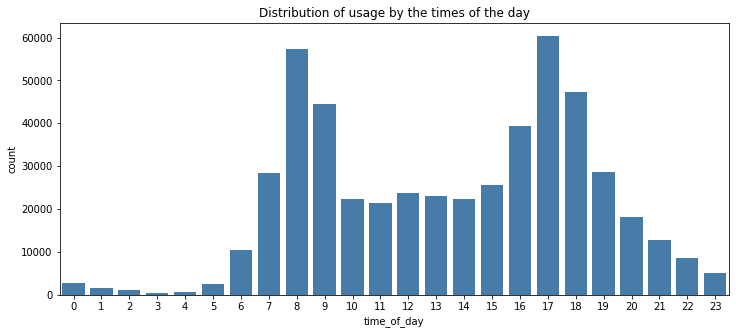

In [100]:
#plot of distribution by the times
plt.figure(figsize=(12, 5))
sb.countplot(final['time_of_day'], color='#377eb8')
plt.title("Distribution of usage by the times of the day")
plt.show();

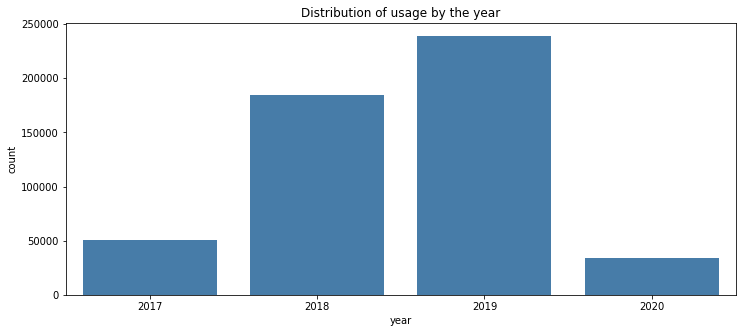

In [101]:
#plot by year
plt.figure(figsize=(12, 5))
sb.countplot(final['year'], color='#377eb8')
plt.title("Distribution of usage by the year")
plt.show();

> From the series of plots above, October had the highest number of bike share use, while December has the lowest, probably due to the cold weather. There is a high use of the service on midweek: Tuesdays, Wednesdays and Thursday than on the weekends. Next we see an obvious spike in use of the service at 7-9am and at 4-6pm, probably due to workgoers. 2019 also had the highest count of users than the other years. However, I will not pay too much mind to this as this dataset is just a sample of the entire dataset and 2020 also doesn't also have its full dataset included.
> Next we look at the distribution of trips by their duration and distance.

##### What are the average duration and distance for trips taken?

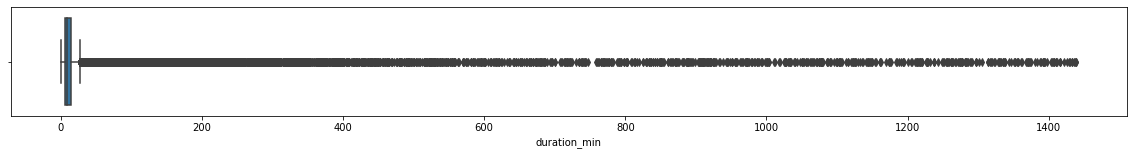

In [84]:
plt.figure(figsize = [20, 2])
base_color = sb.color_palette()[0]
sb.boxplot(data=final, x='duration_min', color=base_color);

> We see from the boxplot that the data is very skewed to the right, so we will look at the percentiles to spot outliers.

In [85]:
final['duration_min'].describe(percentiles = [0.01, 0.05, 0.95, 0.99])

count    512788.000000
mean         14.251144
std          38.214561
min           1.000000
1%            1.816667
5%            3.033333
50%           9.450000
95%          30.200000
99%          88.102167
max        1438.616667
Name: duration_min, dtype: float64

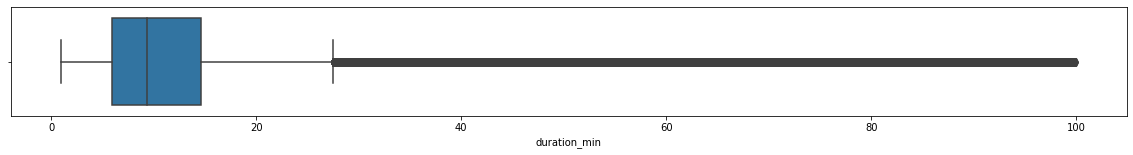

In [86]:
#get rid of outliers
final = final.query('duration_min <= 100')

plt.figure(figsize = [20, 2])
base_color = sb.color_palette()[0]
sb.boxplot(data=final, x='duration_min', color=base_color);

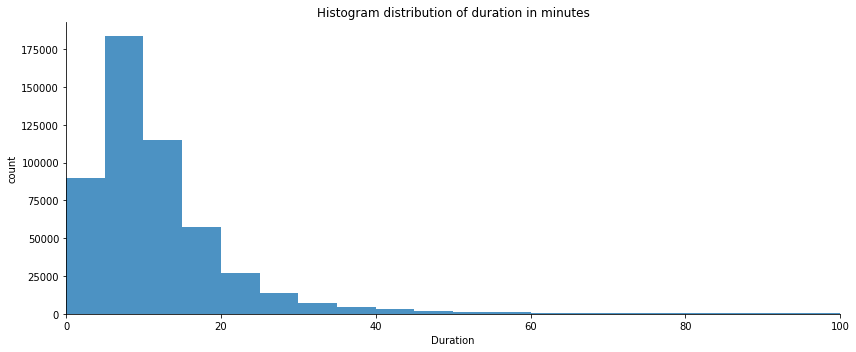

In [87]:
#plot histogram
bin_size = 5
bins = np.arange(0, final.duration_min.max()+bin_size, bin_size)
color = sb.color_palette()[0]
fig, axes = plt.subplots(figsize = (12,5))
plt.hist(final.duration_min, bins = bins, color= color, alpha=0.8)
plt.title('Histogram distribution of duration in minutes')
plt.xlabel('Duration')
plt.ylabel('count')
plt.xlim(0,100)
sb.despine(fig)
plt.tight_layout();

> The histogram shows that most trips are within the 5-10 minute range. Now we do the same process to visualize the distance distribution.

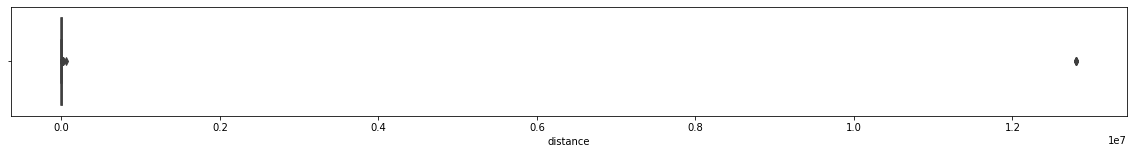

In [106]:
#distance plot
plt.figure(figsize = [20, 2])
base_color = sb.color_palette()[0]
sb.boxplot(data=final, x='distance', color=base_color);

In [105]:
final['distance'].describe(percentiles = [0.01, 0.05, 0.95, 0.99]) #view percentiles

count    5.084830e+05
mean     1.778278e+03
std      4.014350e+04
min      0.000000e+00
1%       0.000000e+00
5%       3.934297e+02
50%      1.413991e+03
95%      3.699192e+03
99%      4.939688e+03
max      1.280234e+07
Name: distance, dtype: float64

In [107]:
final = final.query('distance <= 6000') #get rid of outliers

In [219]:
final['distance'].describe()

count    506836.000000
mean       1635.588920
std        1009.173509
min           0.000000
25%         906.252026
50%        1413.991319
75%        2161.219922
max        5999.995148
Name: distance, dtype: float64

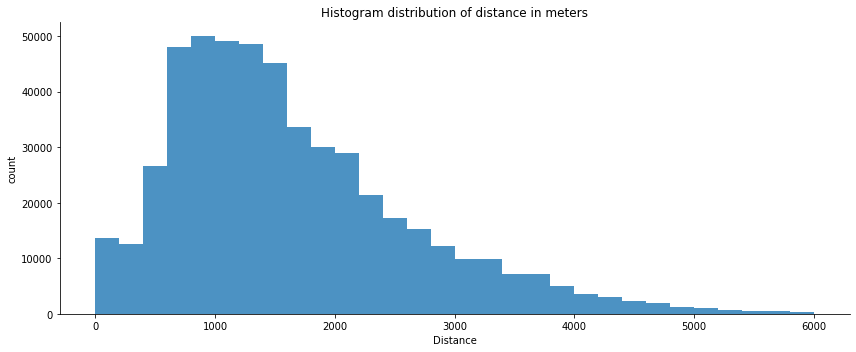

In [111]:
#distance histogram
bin_size = 200
bins = np.arange(0, final.distance.max()+bin_size, bin_size)
color = sb.color_palette()[0]
fig, axes = plt.subplots(figsize = (12,5))
plt.hist(final.distance, bins = bins, color= color, alpha=0.8);
plt.title('Histogram distribution of distance in meters')
plt.xlabel('Distance')
plt.ylabel('count')
sb.despine(fig)
plt.tight_layout();

> The histogram distribution of the trip distances above follows a normal distribution and it shows that most trips are between 600-1800 meters. Next, we look at the stations with the most number of trips leaving and arriving

##### What are the usage trends for incoming and outgoing trips at stations?

In [88]:
top_start_stations = final['start_station_name'].value_counts()[:10]
top_end_stations = final['end_station_name'].value_counts()[:10]

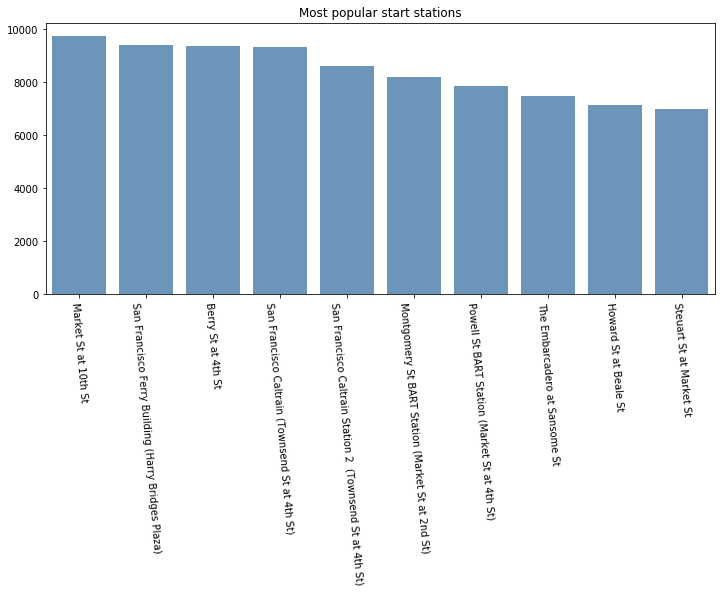

In [92]:
plt.figure(figsize=(12, 5))
sb.barplot(top_start_stations.index, top_start_stations.values, alpha=.8, color='#377eb8')
plt.title("Most popular start stations")
plt.xticks(rotation=-85)
plt.show();

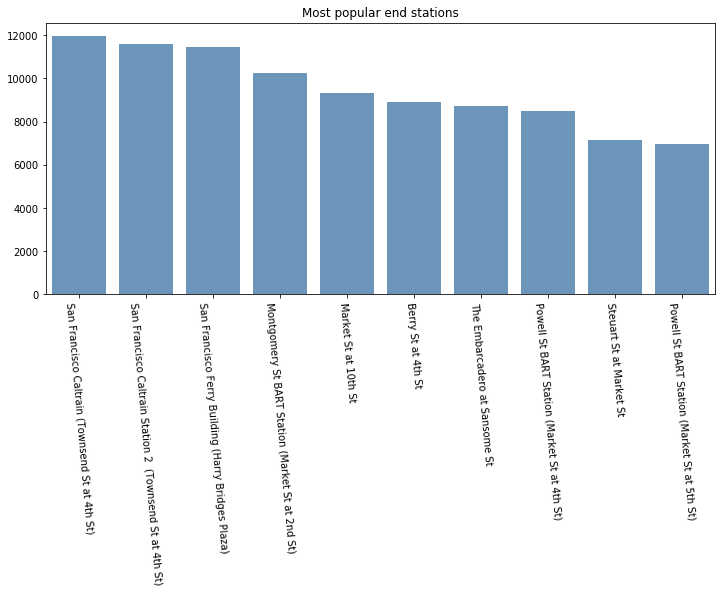

In [93]:
plt.figure(figsize=(12, 5))
sb.barplot(top_end_stations.index, top_end_stations.values, alpha=.8, color='#377eb8')
plt.title("Most popular end stations")
plt.xticks(rotation=-85)
plt.show();

> The plots above show that Market st at 10th st has the highest number of outgoing trips while San Fransisco Caltrain has the highest number of incoming trips.

### Observation on variables of Interest and transformations done

> User type, Month, Weekday, Year and Hour did not need any transformations. 
Distance was feature engineered from the latitude and longitude of the stations.
Duration and distance had unusually long time/distance, with a max value more than 2 times more than the 99th percentile. I considered these as outliers probably from an error on the part of a user forgetting to log off the app after his/her ride.
None of the other variables had any outliers.

### Unusual distributions and cleaning tasks

> As earlier stated, distance and duration had unusual distributions and I considered the unusually large datapoints outliers. For this, I queried the dataset to eliminate distances and duration greater than the value of the 99th percentile, so that a distribution with better spread can be gotten. Without this, the number of bins were not able to accurately display all the datapoints appropriately since most trips were between 5-10 minutes and 600-1800 meters and critical information about the dataset was being lost. There were also entries with distance of zero, but i chose not to remove them from the dataset.

<a id='bivar'></a>
## Bivariate Exploration

> In this section, the relationships between pairs of variables introduced in the previous section will be investigated and explored.

##### What is the relationship between the times/distance people use the bikes and the stations they make the trips from and to?

In [150]:
##relationship between duration and station
startstation_time= final.groupby('start_station_name').mean().sort_values(by=['duration_min'], ascending=False)[:20]
endstation_time= final.groupby('end_station_name').mean().sort_values(by=['duration_min'], ascending=False)[:20]

In [154]:
startstation_time.head()

,bike_id,distance,duration_min,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,time_of_day,year
start_station_name,,,,,,,,,,,,
Viva Calle SJ,1855.000000,0.000000,69.650000,4179.000000,374.000000,37.263310,-121.833332,374.0,37.263310,-121.833332,11.000000,2018.0
Funston Ave at Irving St,80628.000000,1788.614789,40.369608,2422.176471,345.235294,37.769364,-122.454971,450.0,37.763934,-122.470651,13.294118,2020.0
Spruce St at California St,302352.200000,1096.846720,37.846667,2270.800000,424.000000,37.784809,-122.441780,517.0,37.786578,-122.453423,15.400000,2020.0
Clement St at 32nd Ave,7235.142857,2433.649386,34.126190,2047.571429,416.428571,37.781308,-122.471642,516.0,37.781722,-122.492844,13.000000,2020.0
Laurel St at California St,190598.000000,1053.340403,33.966667,2038.000000,387.400000,37.785006,-122.443447,514.0,37.786692,-122.450081,14.600000,2020.0


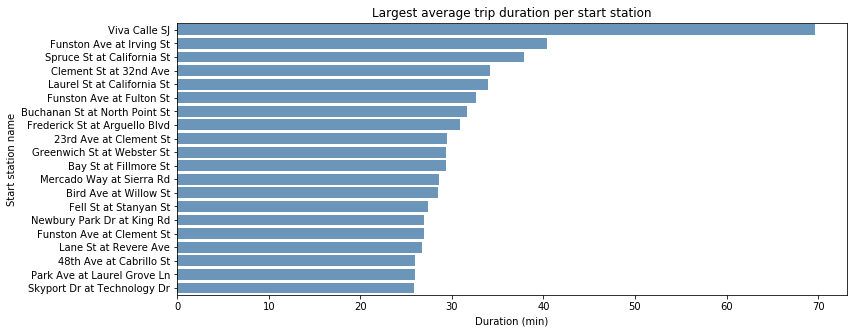

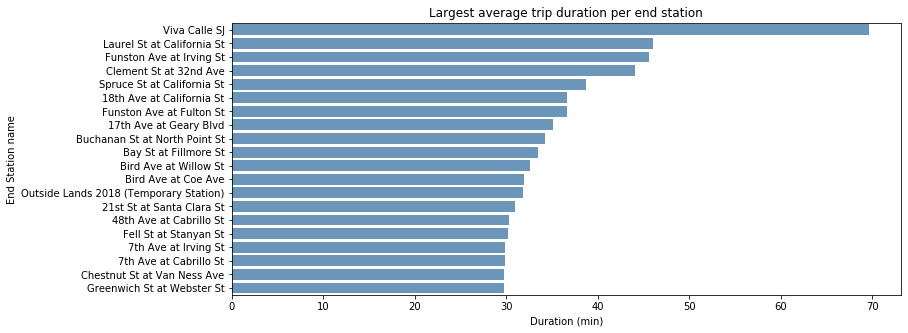

In [151]:
plt.figure(figsize=(12, 5))
sb.barplot(startstation_time.duration_min, startstation_time.index, alpha=.8, color='#377eb8')
plt.title("Largest average trip duration per start station")
plt.xlabel("Duration (min)")
plt.ylabel("Start station name")
plt.show();

plt.figure(figsize=(12, 5))
sb.barplot(endstation_time.duration_min, endstation_time.index, alpha=.8, color='#377eb8')
plt.title("Largest average trip duration per end station")
plt.xlabel("Duration (min)")
plt.ylabel("End Station name")
plt.show();

In [152]:
##relationship between distance and station
startstation_distance= final.groupby('start_station_name').mean().sort_values(by=['distance'], ascending=False)[:20]
endstation_distance= final.groupby('end_station_name').mean().sort_values(by=['distance'], ascending=False)[:20]

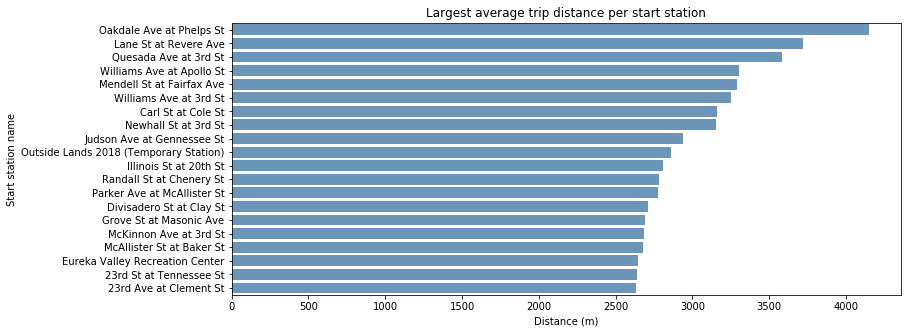

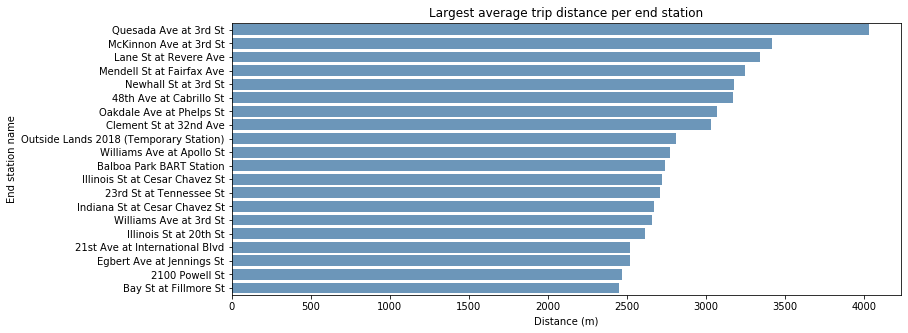

In [153]:
plt.figure(figsize=(12, 5))
sb.barplot(startstation_distance.distance, startstation_distance.index, alpha=.8, color='#377eb8')
plt.title("Largest average trip distance per start station")
plt.xlabel("Distance (m)")
plt.ylabel("Start station name")
plt.show();

plt.figure(figsize=(12, 5))
sb.barplot(endstation_distance.distance, endstation_distance.index, alpha=.8, color='#377eb8')
plt.title("Largest average trip distance per end station")
plt.xlabel("Distance (m)")
plt.ylabel("End station name")
plt.show();

In [198]:
print(endstation_distance.index)

Index(['Quesada Ave at 3rd St', 'McKinnon Ave at 3rd St',
       'Lane St at Revere Ave', 'Mendell St at Fairfax Ave',
       'Newhall St at 3rd St', '48th Ave at Cabrillo St',
       'Oakdale Ave at Phelps St', 'Clement St at 32nd Ave',
       'Outside Lands 2018 (Temporary Station)', 'Williams Ave at Apollo St',
       'Balboa Park BART Station', 'Illinois St at Cesar Chavez St',
       '23rd St at Tennessee St', 'Indiana St at Cesar Chavez St',
       'Williams Ave at 3rd St', 'Illinois St at 20th St',
       '21st Ave at International Blvd', 'Egbert Ave at Jennings St',
       '2100 Powell St', 'Bay St at Fillmore St'],
      dtype='object', name='end_station_name')


> From the plots above, one can see that there is a very clear difference between duration trends and distance usage trends. When it comes to duration, the start and end stations tend to be very different. Stations that have highest duration for outgoing trips do not appear in the list of stations with highest duration for incoming trips. For instance, on the average, Funston ave at Irving st has more people driving long durations from it and Laurel St at California St has more people riding longer times to it. Vive Calle SJ might be an outlier as it has the longest duration to and fro but 0 distance. On the other hand, the distance plots for the start and end stations seem to be in sync. Some of the stations that have highest distances for outgoing trips can be found in the list of stations with highest distance for incoming trips. Places like Quesada Ave at 3rd St, Oakdale Ave at Phelps St, Williams Ave at Apollo St, etc, have more people driving longer distances to and from them.

##### What are the user trends per hour, day, month and year?

In [113]:
user_month = final.groupby(["ride_month", "user_type"]).size().reset_index()
user_month.head()

,ride_month,user_type,0
0,April,Customer,5485
1,April,Subscriber,31175
2,August,Customer,9414
3,August,Subscriber,38395
4,December,Customer,9768


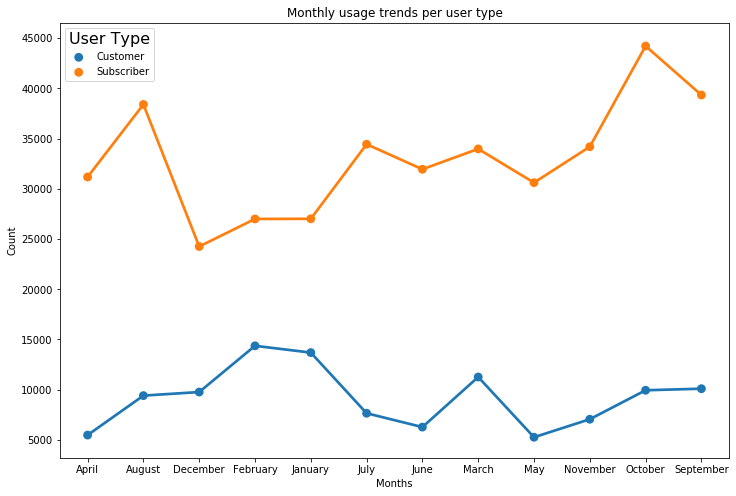

In [114]:
plt.figure(figsize=(12,8))
ax = sb.pointplot(x='ride_month', y=0, hue='user_type', data=user_month)
plt.title('Monthly usage trends per user type')
plt.xlabel('Months')
plt.ylabel('Count')
leg = ax.legend()
leg.set_title('User Type',prop={'size':16});

In [115]:
user_day = final.groupby(["day_of_week", "user_type"]).size().reset_index()
user_day.head()

,day_of_week,user_type,0
0,Fri,Customer,16928
1,Fri,Subscriber,62953
2,Mon,Customer,14932
3,Mon,Subscriber,65252
4,Sat,Customer,16401


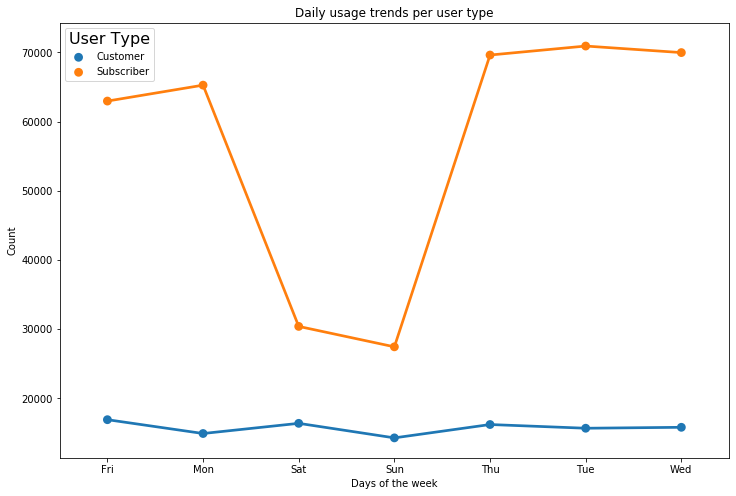

In [116]:
plt.figure(figsize=(12,8))
ax = sb.pointplot(x='day_of_week', y=0, hue='user_type', data=user_day)
plt.title('Daily usage trends per user type')
plt.xlabel('Days of the week')
plt.ylabel('Count')
leg = ax.legend()
leg.set_title('User Type',prop={'size':16});

In [117]:
user_time = final.groupby(["time_of_day", "user_type"]).size().reset_index()
user_time.head()

,time_of_day,user_type,0
0,0,Customer,725
1,0,Subscriber,2012
2,1,Customer,488
3,1,Subscriber,1146
4,2,Customer,313


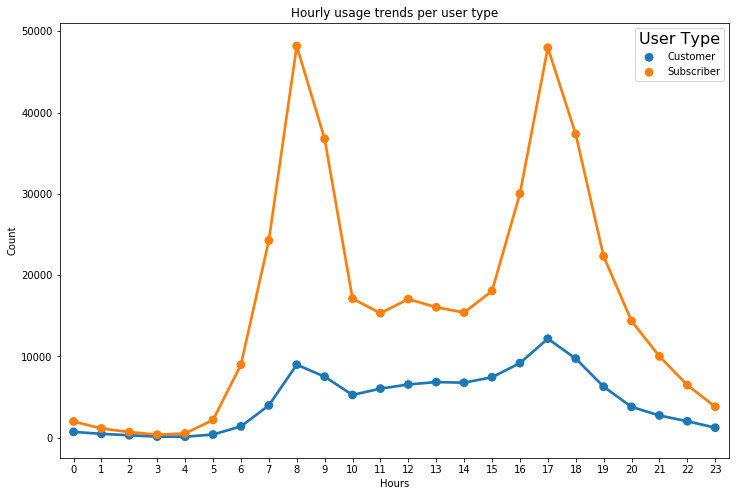

In [119]:
plt.figure(figsize=(12,8))
ax = sb.pointplot(x='time_of_day', y=0, hue='user_type', data=user_time)
plt.title('Hourly usage trends per user type')
plt.xlabel('Hours')
plt.ylabel('Count')
leg = ax.legend()
leg.set_title('User Type',prop={'size':16});

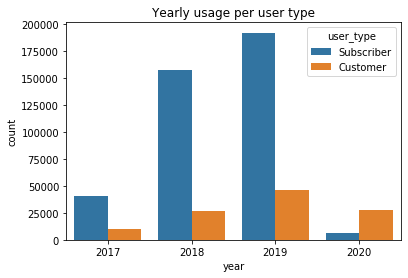

In [121]:
ax = sb.countplot(x=final.year, hue=final.user_type, data=final)
plt.title("Yearly usage per user type")
plt.show();

> The monthly distribution for user types varies quite a lot. While October and December has the highest and lowest patronage respectively for Subscribers to the service, Customers seem to be using the service most in February and least in May. Weekday usage is also different. While Subscribers use the service typically during the week and much less on weekends, Customers use the service more on weekends. Hourly distribution follows fairly the same pattern of spiking at 7-9am and again at 4-6pm for both types of users, but Customers have a relatively high plateau of usage between these peaks as well. Yearly usage shows that Customer patronage has increased over the years, and even more surprising was that there was more representation for Customers in the data than Subscribers for 2020 data.

##### What are the trends in how long and how far different types of users use the bike share service?

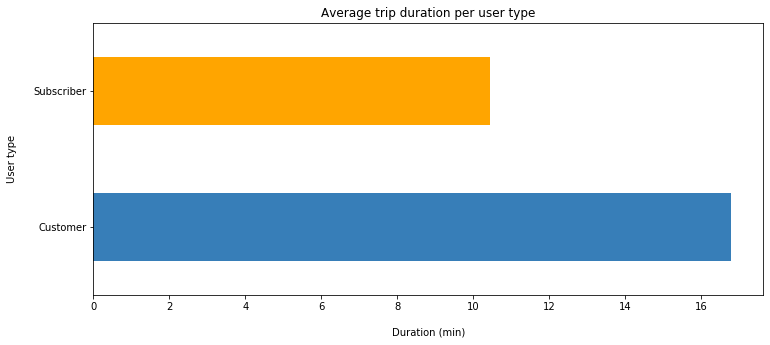

In [158]:
##user trends for duration
ax = final.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=['#377eb8', 'orange'], figsize=(12,5))
ax.set_title('Average trip duration per user type')
ax.set_ylabel('User type', labelpad=16)
ax.set_xlabel('Duration (min)', labelpad=16);



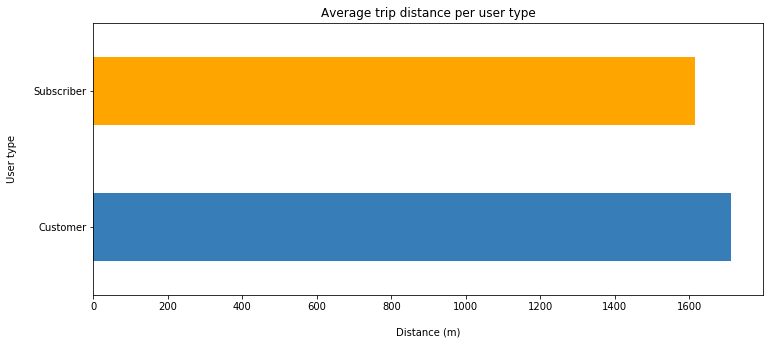

In [159]:
##user trends for distance
ax = final.groupby('user_type')['distance'].mean().plot(kind='barh', color=['#377eb8', 'orange'], figsize=(12,5))
ax.set_title('Average trip distance per user type')
ax.set_ylabel('User type', labelpad=16)
ax.set_xlabel('Distance (m)', labelpad=16);


> On the average, Customers travel longer duration and distances with the bike sharing service than Subscribers.

### How did the feature(s) of interest vary with other features in the dataset?

> From the investigation, user type has a large influence on monthly, daily and hourly usage. Average duration and average distance also varies by user type. The relationship between stations and the duration and distance travelled to/from them was quite interesting to see, as this highlights which stations are important.

### Interesting relationships between the other features (not the main feature(s) of interest)

> I noticed an interesting relationship between stations and duration/distance travelled to and from them. I would like to see how this relationship varies by user type in the following sections. I will also like to do a more complex investigation into the relationship between user type, days and hours.

<a id='multivar'></a>
## Multivariate Exploration

> Here, plots of three or more variables are created to investigate the data even more complex relationships.

##### How do the different user type use the service per hours in a week?

In [160]:
sub_df = final.query('user_type == "Subscriber"').groupby(['time_of_day','day_of_week']).agg({'bike_id' : 'count'})
sub_df = sub_df.pivot_table(index='time_of_day', columns='day_of_week', values='bike_id')
cus_df = final.query('user_type == "Customer"').groupby(['time_of_day','day_of_week']).agg({'bike_id' : 'count'})
cus_df = cus_df.pivot_table(index='time_of_day', columns='day_of_week', values='bike_id')

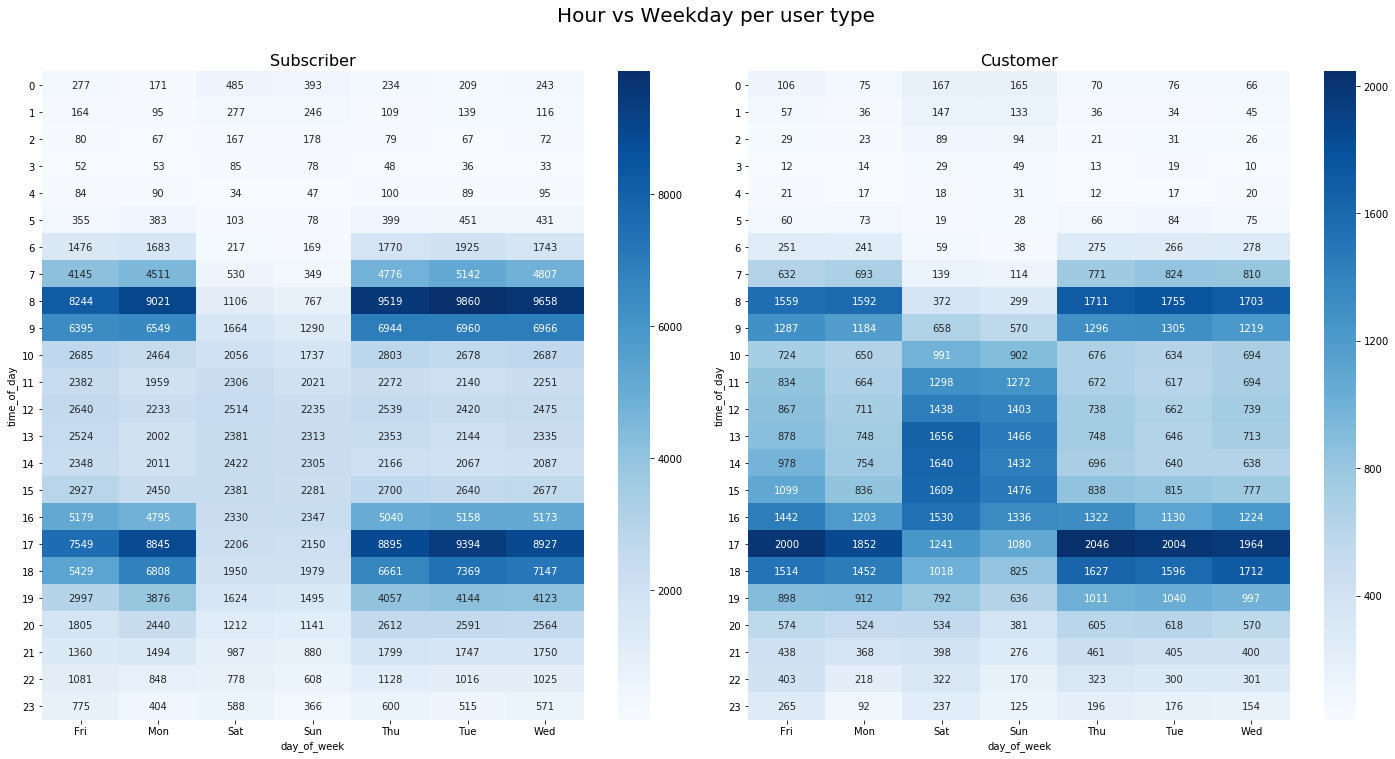

In [162]:
plt.subplots(figsize=(20,10))

fig1 = plt.subplot(1,2,1)
ax1 = sb.heatmap(sub_df, annot=True, fmt='d', cmap='Blues')
plt.title('Subscriber',size=16)
plt.yticks(rotation=360)

fig2 = plt.subplot(1,2,2)
ax2 = sb.heatmap(cus_df, annot=True, fmt='d', cmap='Blues')
plt.title('Customer',size=16)
plt.yticks(rotation=360)
plt.suptitle("Hour vs Weekday per user type", size=20, y=1.05)
plt.tight_layout();

> One can see from the above plots that Subscribers use the service mostly during a certain time of the day and days of the week while Customers don't particularly have specific times. We can say that usage is more routine-like for Subscribers while Customer usage is more random-like.

##### What stations do the different user types travel long distances and durations from each week?

In [181]:
##distance of trip from station per day per user type
stat_day_sub_dist = final.query('user_type == "Subscriber"').groupby(['start_station_name', 'day_of_week']).mean().sort_values(by=['distance'], ascending=False)[:20]
stat_day_sub_dist = stat_day_sub_dist.pivot_table(index='start_station_name', columns='day_of_week', values='distance')
stat_day_cus_dist = final.query('user_type == "Customer"').groupby(['start_station_name', 'day_of_week']).mean().sort_values(by=['distance'], ascending=False)[:20]
stat_day_cus_dist = stat_day_cus_dist.pivot_table(index='start_station_name', columns='day_of_week', values='distance')


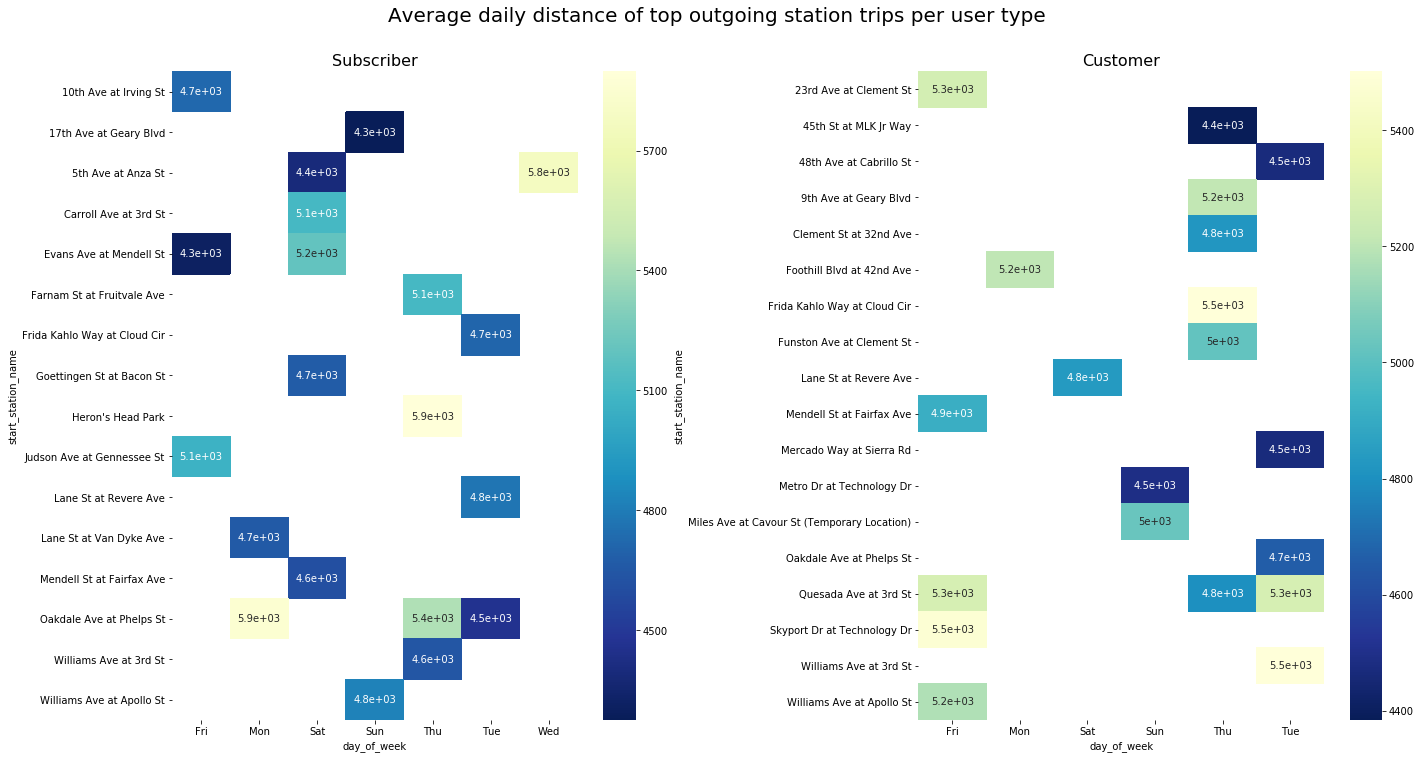

In [184]:
plt.subplots(figsize=(20,10))

fig1 = plt.subplot(1,2,1)
ax1 = sb.heatmap(stat_day_sub_dist, annot=True, cmap='YlGnBu_r')
plt.title('Subscriber',size=16)
plt.yticks(rotation=360)


fig2 = plt.subplot(1,2,2)
ax2 = sb.heatmap(stat_day_cus_dist, annot=True, cmap='YlGnBu_r')
plt.title('Customer',size=16)
plt.yticks(rotation=360)
plt.suptitle("Average daily distance of top outgoing station trips per user type", size=20, y=1.05)
plt.tight_layout();

In [186]:
##duration of trip from station per day per user type
stat_day_sub_dur = final.query('user_type == "Subscriber"').groupby(['start_station_name', 'day_of_week']).mean().sort_values(by=['duration_min'], ascending=False)[:20]
stat_day_sub_dur = stat_day_sub_dur.pivot_table(index='start_station_name', columns='day_of_week', values='duration_min')
stat_day_cus_dur = final.query('user_type == "Customer"').groupby(['start_station_name', 'day_of_week']).mean().sort_values(by=['duration_min'], ascending=False)[:20]
stat_day_cus_dur = stat_day_cus_dur.pivot_table(index='start_station_name', columns='day_of_week', values='duration_min')


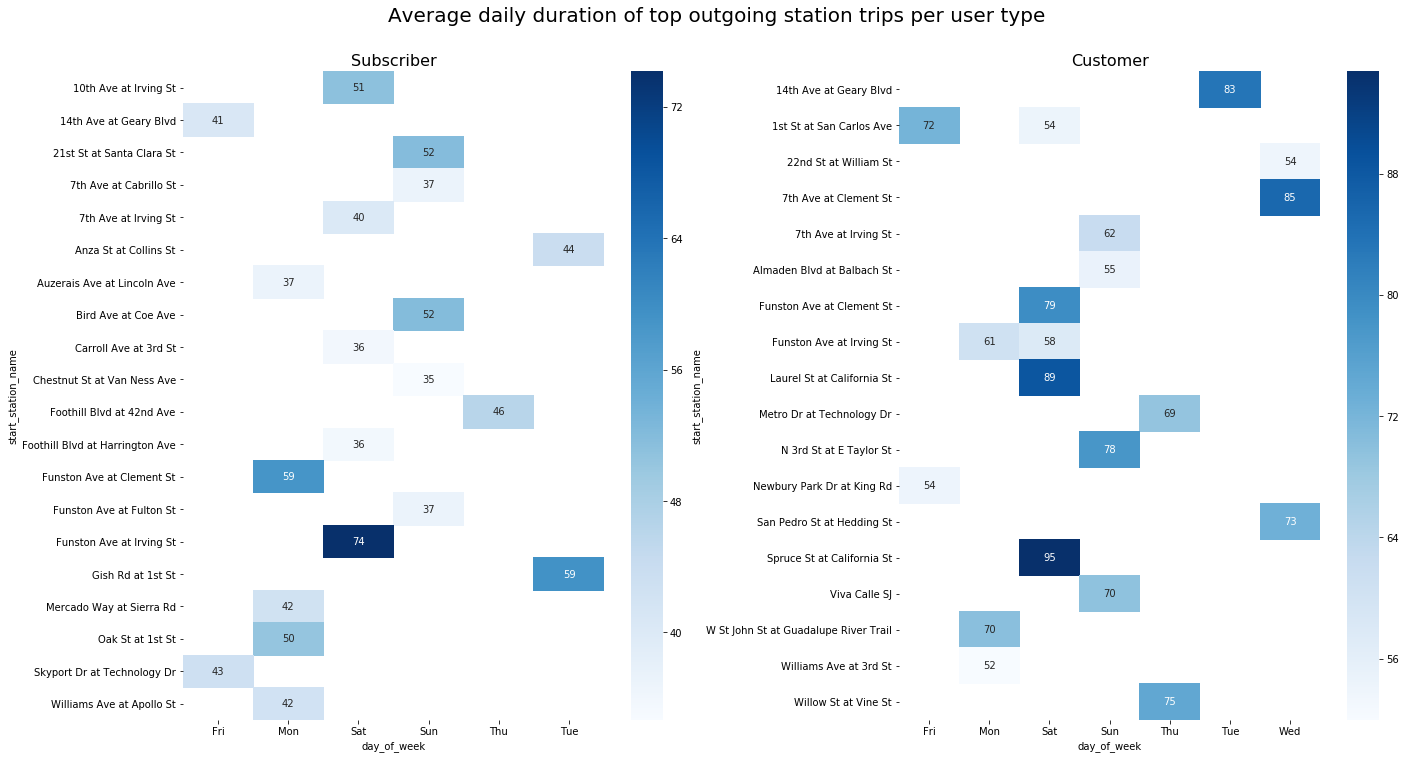

In [192]:
plt.subplots(figsize=(20,10))

fig1 = plt.subplot(1,2,1)
ax1 = sb.heatmap(stat_day_sub_dur, annot=True, cmap='Blues')
plt.title('Subscriber',size=16)
plt.yticks(rotation=360)


fig2 = plt.subplot(1,2,2)
ax2 = sb.heatmap(stat_day_cus_dur, annot=True, cmap='Blues')
plt.title('Customer',size=16)
plt.yticks(rotation=360)
plt.suptitle("Average daily duration of top outgoing station trips per user type", size=20, y=1.05)
plt.tight_layout();

> For subscribers, the distance map is very streamlined, showing that they practice routine rides. They seem to be biking long distances a lot from Heron's Head Park on Thursdays, Oakdale Ave at Phelps str on Mondays and 5th Ave at Anza St on Wednesdays. On the other hand, Customers are driving a lot of long distance from many different locations on different days. However, Thursdays and Fridays seem to be a very popular spot for a lot of locations.
The duration heat map shows that the highest average outgoing trip comes from Funstonn Ave at Irving St on Saturdays for Subscribers, and from Spuce St at California St also on Saturdays.

##### What stations do the different user types travel long distances and durations to each week?

In [183]:
##distance of trip to station per day per user type
endstat_day_sub_dist = final.query('user_type == "Subscriber"').groupby(['end_station_name', 'day_of_week']).mean().sort_values(by=['distance'], ascending=False)[:20]
endstat_day_sub_dist = endstat_day_sub_dist.pivot_table(index='end_station_name', columns='day_of_week', values='distance')
endstat_day_cus_dist = final.query('user_type == "Customer"').groupby(['end_station_name', 'day_of_week']).mean().sort_values(by=['distance'], ascending=False)[:20]
endstat_day_cus_dist = endstat_day_cus_dist.pivot_table(index='end_station_name', columns='day_of_week', values='distance')

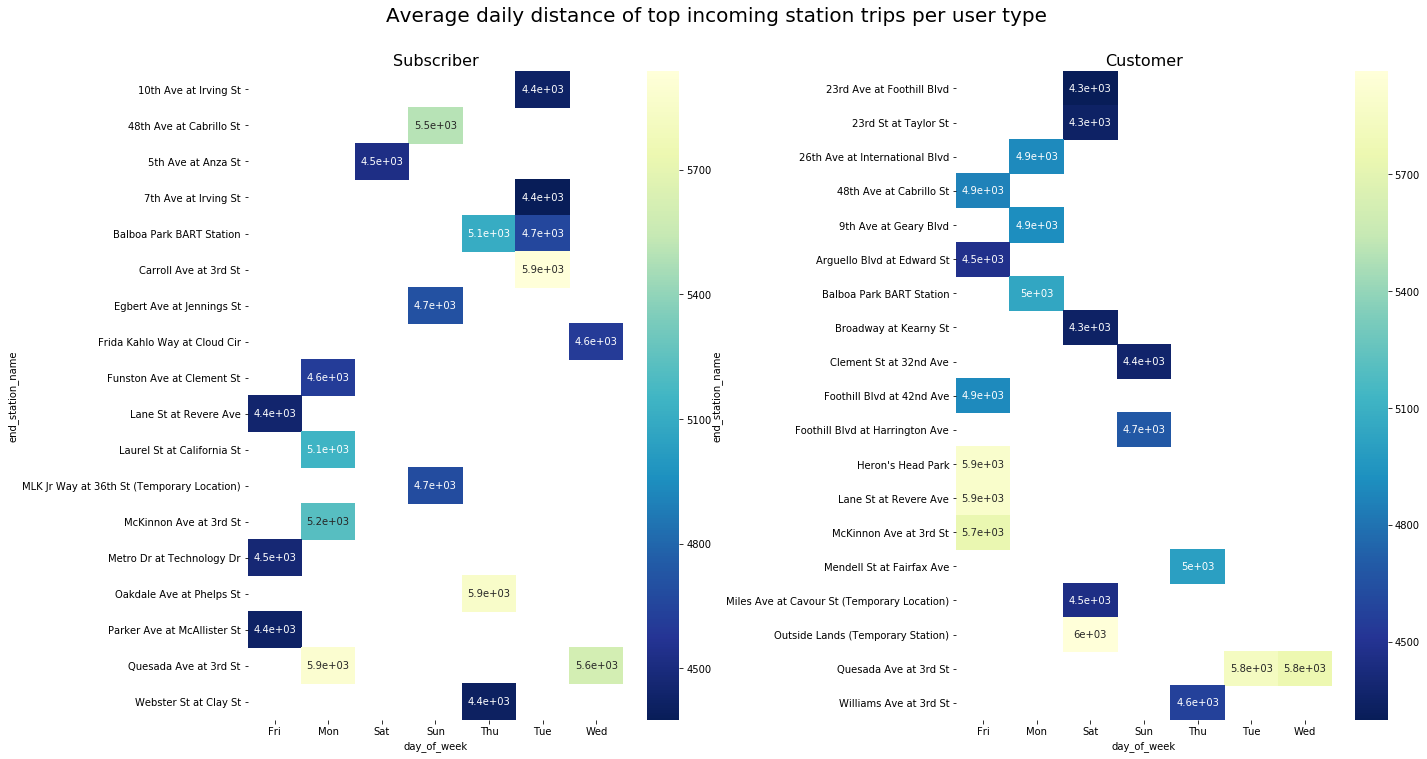

In [193]:
plt.subplots(figsize=(20,10))

fig1 = plt.subplot(1,2,1)
ax1 = sb.heatmap(endstat_day_sub_dist, annot=True, cmap='YlGnBu_r')
plt.title('Subscriber',size=16)
plt.yticks(rotation=360)


fig2 = plt.subplot(1,2,2)
ax2 = sb.heatmap(endstat_day_cus_dist, annot=True, cmap='YlGnBu_r')
plt.title('Customer',size=16)
plt.yticks(rotation=360)
plt.suptitle("Average daily distance of top incoming station trips per user type", size=20, y=1.05)
plt.tight_layout();

In [188]:
##duration of trip to station per day per user type
endstat_day_sub_dur = final.query('user_type == "Subscriber"').groupby(['end_station_name', 'day_of_week']).mean().sort_values(by=['duration_min'], ascending=False)[:20]
endstat_day_sub_dur = endstat_day_sub_dur.pivot_table(index='end_station_name', columns='day_of_week', values='duration_min')
endstat_day_cus_dur = final.query('user_type == "Customer"').groupby(['end_station_name', 'day_of_week']).mean().sort_values(by=['duration_min'], ascending=False)[:20]
endstat_day_cus_dur = endstat_day_cus_dur.pivot_table(index='end_station_name', columns='day_of_week', values='duration_min')


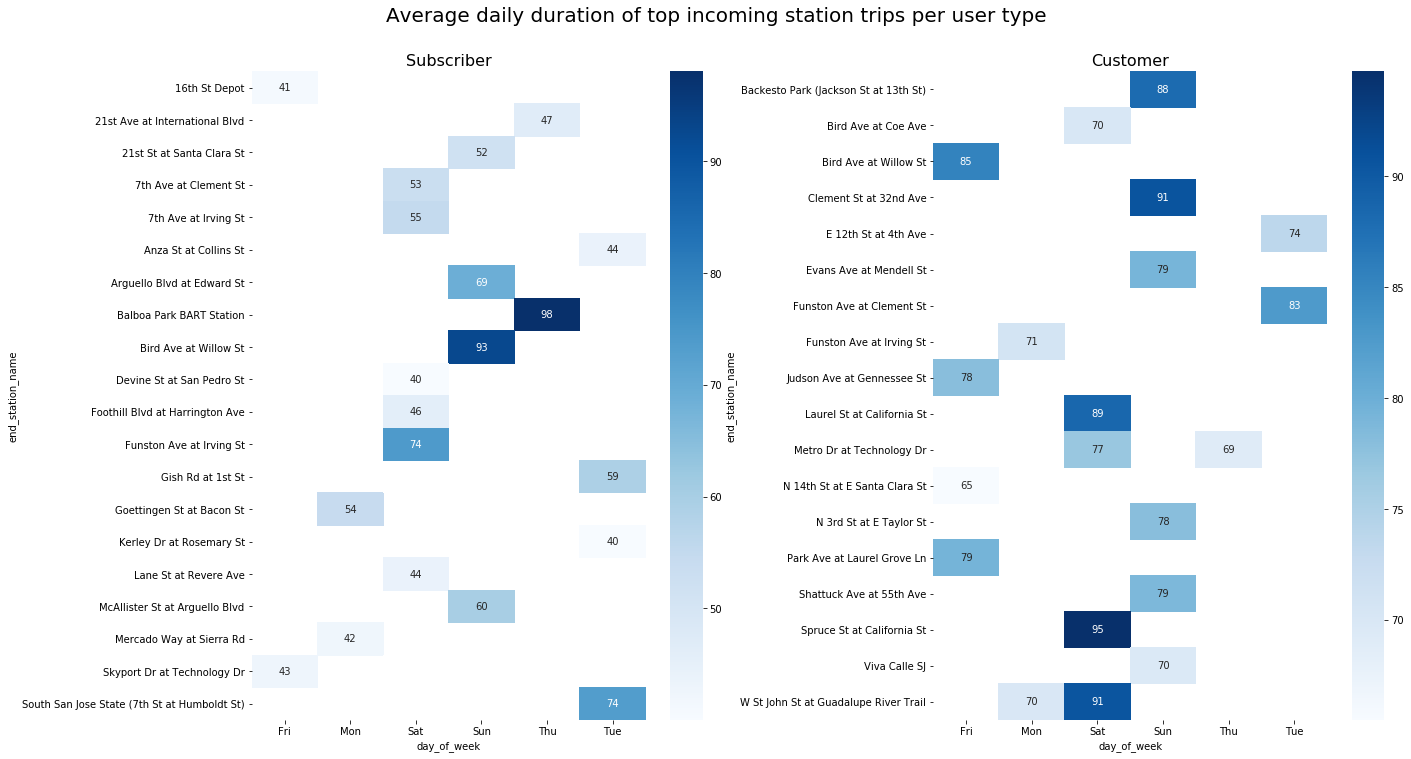

In [194]:
plt.subplots(figsize=(20,10))

fig1 = plt.subplot(1,2,1)
ax1 = sb.heatmap(endstat_day_sub_dur, annot=True, cmap='Blues')
plt.title('Subscriber',size=16)
plt.yticks(rotation=360)


fig2 = plt.subplot(1,2,2)
ax2 = sb.heatmap(endstat_day_cus_dur, annot=True, cmap='Blues')
plt.title('Customer',size=16)
plt.yticks(rotation=360)
plt.suptitle("Average daily duration of top incoming station trips per user type", size=20, y=1.05)
plt.tight_layout();

> We see that Subscribers are travelling long distances and durations on the average to few particular areas e.g. Quesada Ave at 3rd str on Mondays, Oakdale Ave at Phelps St on Thursdays and Biloboa Park also on Thursdays, while Customers are biking long distances and durations to multiple areas e.g. Herod's Head Park, Lane St at Revere Ave on Fridays and Outside Lands on Saturdays. 

### Relationships observed in this part of the investigation.

> There was a strong pattern to the days of the week and hour of the day Subscribers use the service. Also, stations and distances/durations travelled to and from them already had a strong correlation from the previous section, but when days of the week and user types were introduced into investigation, it allowed us see better the way user behaviour influences trip usage.

### Were there any interesting or surprising interactions between features?

> A very interesting interaction was how user type affect the bike sharing service. Across the investigations, Subscribers tend to be more routine-like in their usage while Customers tend to be more random.